# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [93]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hero/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
# Read your api key environment variable
load_dotenv()
NEWS_API_KEY = os.environ.get("NEWS_API_KEY") 

In [95]:
# Create a newsapi client
!pip install newsapi-python 
from newsapi import NewsApiClient 
newsapi = NewsApiClient(api_key=NEWS_API_KEY)

In [96]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin: 13229


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/richard-lawler',
 'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
 'description': "You can't buy a Tesla with Bitcoin anymore..",
 'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
 'publishedAt': '2021-05-12T22:17:08Z',
 'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'}

In [97]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 4084


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Manish Singh',
 'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
 'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
 'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
 'publishedAt': '2021-05-12T22:46:10Z',
 'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]'}

In [98]:
def get_sentiment_scores_df(headlines):
    sentiments = []

    for article in headlines["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]
    return df

In [99]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = get_sentiment_scores_df(btc_headlines)
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957
4,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000


In [100]:
# Create the Ethereum sentiment scores DataFrame
eth_df = get_sentiment_scores_df(eth_headlines)
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
3,2021-05-20,,0.0000,0.000,0.000,0.000
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000


In [101]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.245140,0.090350,0.03805,0.871650
std,0.451393,0.074865,0.05079,0.073753
min,-0.762700,0.000000,0.00000,0.718000
25%,0.096000,0.055750,0.00000,0.833500
50%,0.360900,0.071000,0.00000,0.886500
75%,0.560725,0.139000,0.06800,0.929000
max,0.840200,0.282000,0.18000,1.000000


In [102]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.004090,0.046450,0.04320,0.860350
std,0.383354,0.051248,0.07840,0.218431
min,-0.868900,0.000000,0.00000,0.000000
25%,-0.236725,0.000000,0.00000,0.838250
50%,0.000000,0.055500,0.00000,0.920500
75%,0.226300,0.068000,0.07125,0.961750
max,0.670500,0.188000,0.28600,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [103]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [104]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/hero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /Users/hero/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'mln', 'kilolitres','kl'}

In [106]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lowered = [word.lower() for word in lemmatized]
    
    # Remove the stop words
    tokens = [word for word in lowered if word not in sw.union(sw_addon)]
    return tokens

In [107]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957,"[el, salvador, ha, become, first, country, wor..."
4,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."


In [108]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
2,2021-05-19,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
3,2021-05-20,,0.0000,0.000,0.000,0.000,[]
4,2021-05-31,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [109]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = btc_df['tokens'].apply(lambda x: list(ngrams(x, n=2)))
btc_bigrams = [bigram for bigrams in btc_bigram.tolist() for bigram in bigrams]

In [111]:
# Generate the Ethereum N-grams where N=2
eth_bigram = eth_df['tokens'].apply(lambda x: list(ngrams(x, n=2)))
eth_bigrams = [bigram for bigrams in eth_bigram.tolist() for bigram in bigrams]

In [112]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [113]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(token_count(btc_bigrams, 10)))

{('elon', 'musk'): 5, ('accepting', 'bitcoin'): 4, ('president', 'nayib'): 2, ('nayib', 'bukele'): 2, ('bitcoin', 'legal'): 2, ('stopped', 'accepting'): 2, ('ceo', 'elon'): 2, ('salvador', 'ha'): 2, ('ha', 'become'): 2, ('become', 'first'): 2}


In [114]:
# Use token_count to get the top 10 words for Ethereum
print(dict(token_count(eth_bigrams, 10)))

{('vitalik', 'buterin'): 2, ('bitcoin', 'ethereum'): 2, ('hundred', 'billion'): 2, ('virtual', 'currency'): 2, ('illustration', 'taken'): 2, ('article', 'wa'): 2, ('wa', 'translated'): 2, ('translated', 'spanish'): 2, ('spanish', 'edition'): 2, ('edition', 'using'): 2}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

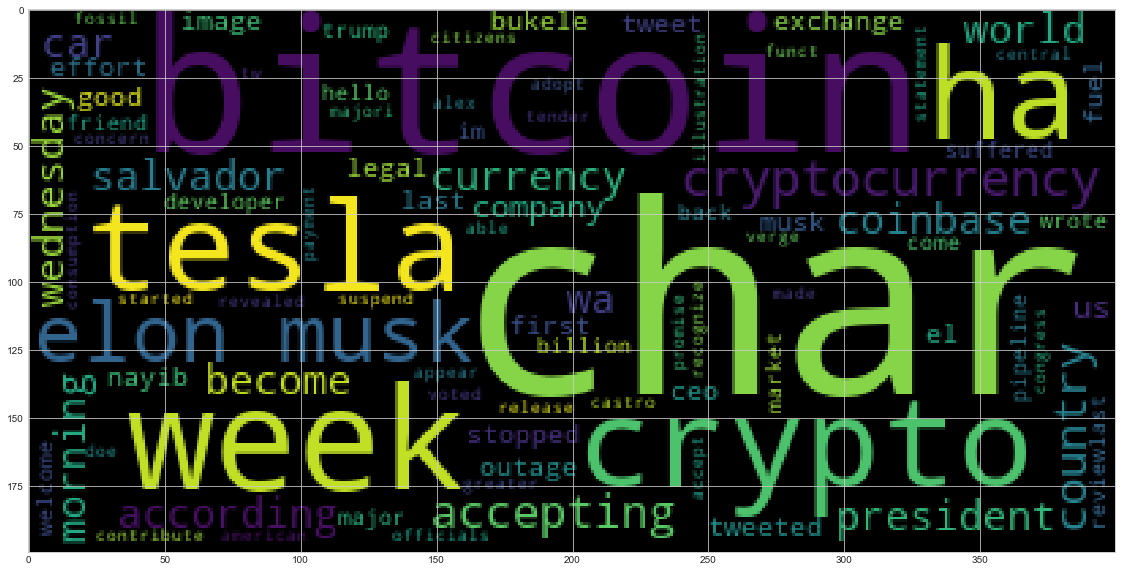

In [116]:
# Generate the Bitcoin word cloud
all_btc_tokens = [token for tokens in btc_df['tokens'].tolist() for token in tokens]
btc_big_string = " ".join(all_btc_tokens)
wc = WordCloud().generate(btc_big_string)
plt.imshow(wc)

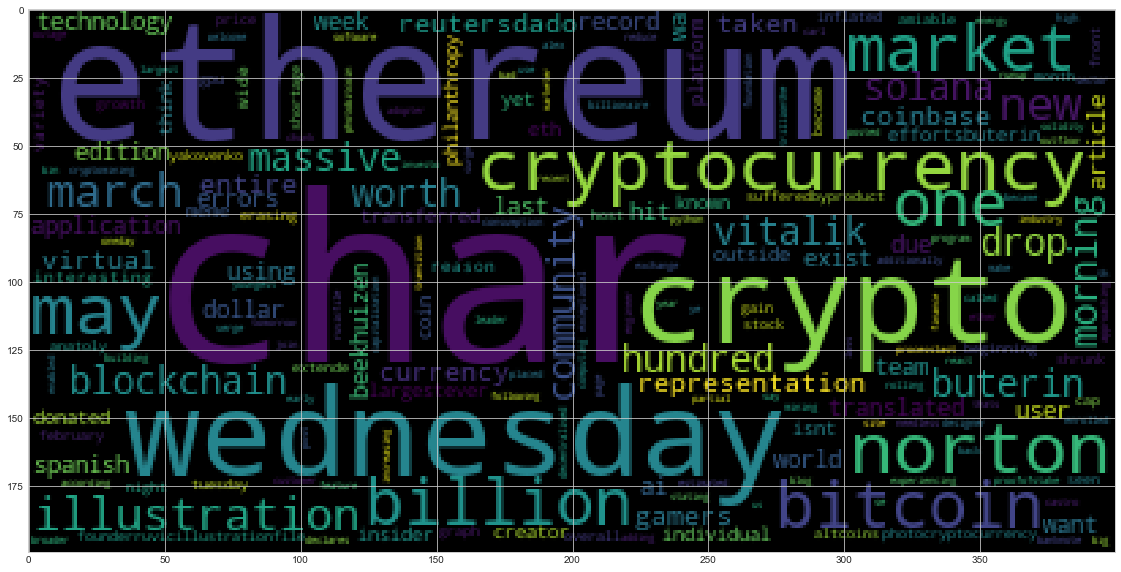

In [117]:
# Generate the Ethereum word cloud
all_eth_tokens = [token for tokens in eth_df['tokens'].tolist() for token in tokens]
eth_big_string = " ".join(all_eth_tokens)
wc = WordCloud().generate(eth_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [118]:
import spacy
from spacy import displacy

In [119]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 4.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [120]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [121]:
# Concatenate all of the Bitcoin text together
btc_big_text = " ".join(btc_df['text'].tolist())

In [122]:
# Run the NER processor on all of the text
doc = nlp(btc_big_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [123]:
# Render the visualization
displacy.render(doc, style='ent')

In [124]:
# List all Entities
print([ent.text for ent in doc.ents])

['Just weeks', 'Tesla', 'Bitcoin', 'Elon Musk', "El Salvador's", 'Nayib Bukele', 'Central American', 'Tesla', 'Elon Musk', 'El Salvador', 'first', 'Nayib Bukele', 'Wednesday', 'Citizens', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Last week', 'Musk', 'Dogecoin', 'Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'hours-long', 'this morning', 'May 19th', 'US', 'El Salvador', 'first', 'Bitcoin', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'Last week', 'Disney', 'This week', 'Tec', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'more than 5,500 miles', 'the United States', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'Photo', 'Michele Doying', 'Verge', 'Iran', 'Last week', 'Trump', 'This week', 'Elon Musk’s', 'Aust

---

### Ethereum NER

In [125]:
# Concatenate all of the Ethereum text together
eth_big_text = " ".join(eth_df['text'].tolist())

In [126]:
# Run the NER processor on all of the text
doc = nlp(eth_big_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [127]:
# Render the visualization
displacy.render(doc, style='ent')

In [128]:
# List all Entities
print([ent.text for ent in doc.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'Solana', 'Anatoly Yakovenko', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'Ethereum', 'February 19, 2021', 'GPU', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Spanish', 'AI', 'Last May', 'Buterin', '27', '99.95%', 'Carl Beekhuizen', 'the Ethereum Foundation', 'Beekhuizen', 'tomorrow', 'Norton', 'Norton', 'Norton Crypto', 'Bitcoin', 'U.S. Dollar', 'May 26, 2020', 'Dado Ruvic/File PhotoBitcoin', 'last week', 'one-day', 'March last year', 'Wednesday', '$1 trillion', 'Wednesday', 'Entrepreneur', 'March 2021', 'more than one million', 'SafeMoon', 'about one hundred billion trillion dollars', 'decades', 'Ill', 'Jacks', 'CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'Spanish', 'AI', 'This week', 'March 2020']


---